The following function, called "retrieveinfo," is for collecting and calculating useful information from the specified TPF. This works for either Kepler or Tess. Simply define the tpf as "tpf = TessTargetPixelFile(a)" where is the domain of the file. Then, input that tpf into the retrieveinfo function, "retrieveinfo(tpf)." 



In [58]:
%matplotlib inline
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
from lightkurve import KeplerTargetPixelFile

In [59]:
import lightkurve
print(lightkurve.__version__)

1.0.1


In [60]:
def retrieveinfo(tpf):#tpf = TessTargetPixelFile(a)
    
    #basic info about tpf_tess
    print("Name of mission:",tpf.mission)
    print("ID Number:",tpf.targetid)
    
    #plotting the tpf data

    print("TPF Plot at Frame=0:",tpf.plot(frame=0));
    print("TPF Plot with Aperture Mask set as Pipeline Mask:",tpf.plot(aperture_mask=tpf.pipeline_mask));
    
    #get lightcurves
    lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
    lc = lc.normalize().remove_nans().remove_outliers().fill_gaps()
    print("Light Curve with Error Bars:",lc.errorbar());
    print("Number of Cadences in the Full Light Curve:",lc.time.shape)
    print("Light Curve Plot Try 1: ",lc.plot());
    print("Light Curve Scatter Plot Try 2: ",lc.scatter());
    #periodogram
    
  
    pg = lc.to_periodogram(oversample_factor=10)
    print("Periodogram Plot: ",pg.plot());
                    #print(pg.plot(view='period',scale='log'))
    period = pg.period_at_max_power
    print('Best Period (original): {}'.format(period))
       # lc=lc.fold(period.value).bin(binsize=10).scatter()
    print('light curve scatter plot folded',lc.fold(period.value).bin(binsize=10).scatter())
    for period in range(0,1):
        period1 = period * 4
        print('Best Period (for eclipsing binaries): {}'.format(period1))
        print("light curve stuff???",lc.remove_nans().fold(period1).scatter())


In [61]:
#tpf = search_targetpixelfile(10264202, quarter=10).download()
#retrieveinfo(tpf)

In [62]:
#tpf = KeplerTargetPixelFile('https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz')
#retrieveinfo(tpf)


Best Period (original): 299.4239308205821 d


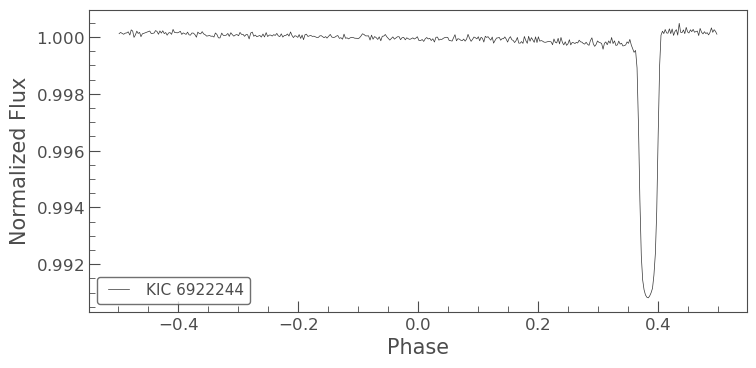

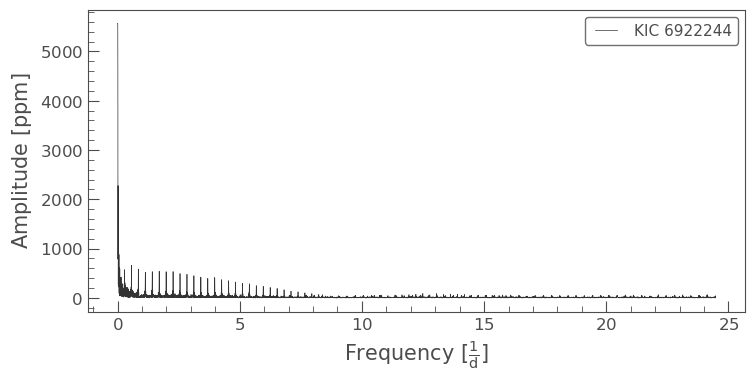

In [63]:
lc=tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();
pg = lc.to_periodogram(oversample_factor=10)
pg.plot();
period = pg.period_at_max_power
print('Best Period (original): {}'.format(period))

In [64]:
tic=141913487
tpf = search_targetpixelfile(tic, sector=9).download()

In [65]:
? search_targetpixelfile


In [66]:
? print

In [67]:
tpf.mission

'TESS'

In [68]:
? TessLightCurveFile

Object ` TessLightCurveFile` not found.


In [69]:
? lightkurve.lightcurvefile.TessLightCurveFile

In [70]:
from lightkurve import TessLightCurveFile
from lightkurve import search_lightcurvefile

In [71]:
? TessLightCurveFile

In [72]:
? search_lightcurvefile

In [73]:
? to_lightcurve

Object ` to_lightcurve` not found.


In [74]:
? tpf.to_lightcurve

In [75]:
? flatten()

Object ` flatten()` not found.


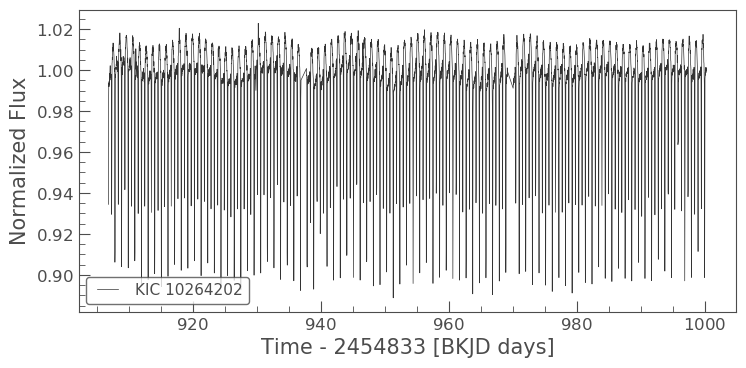

In [76]:
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('10264202', quarter=10).download().PDCSAP_FLUX.remove_nans()
lc.plot();

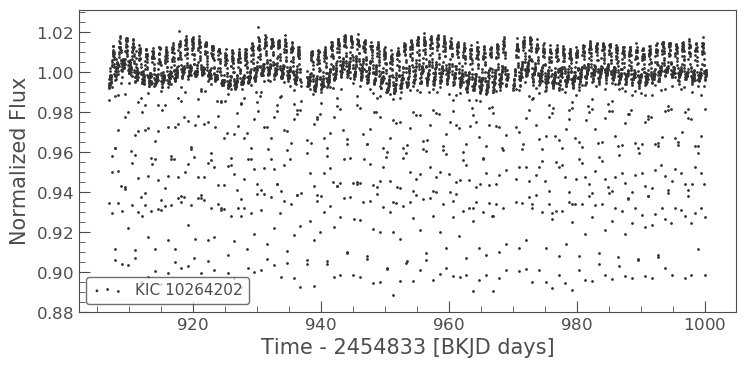

In [77]:
lc.scatter();

In [78]:
tpf=search_targetpixelfile(220323146, sector=6).download();

/Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [79]:
tpf1 = search_targetpixelfile(220338578, sector=6).download();

/Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [80]:
tpf2 = search_targetpixelfile(220323021, sector=6).download()

No data found for target "220323021".
/Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [81]:
#redo of tpf using local url, kh 15D option 1
tpf3=TessTargetPixelFile('https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018349182459-s0006-0000000220323146-0126-s_tp.fits')

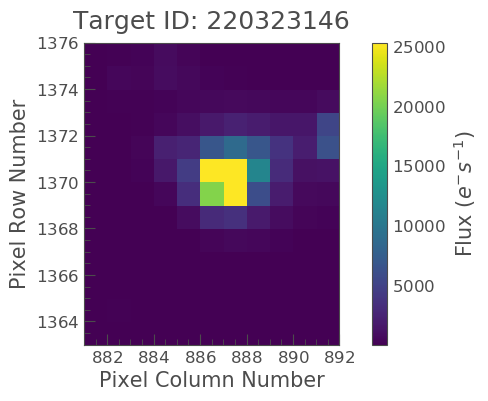

In [82]:
tpf3.plot(frame=0);

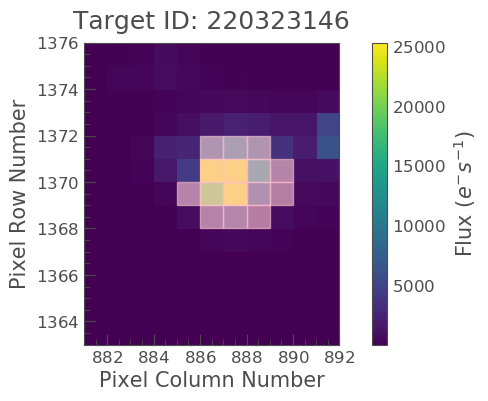

In [83]:
tpf3.plot(aperture_mask=tpf3.pipeline_mask);

In [84]:
lc3 = tpf3.to_lightcurve()

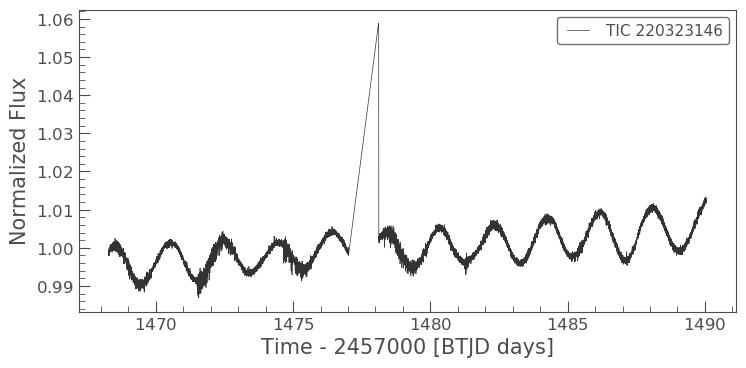

In [85]:
lc3.plot();

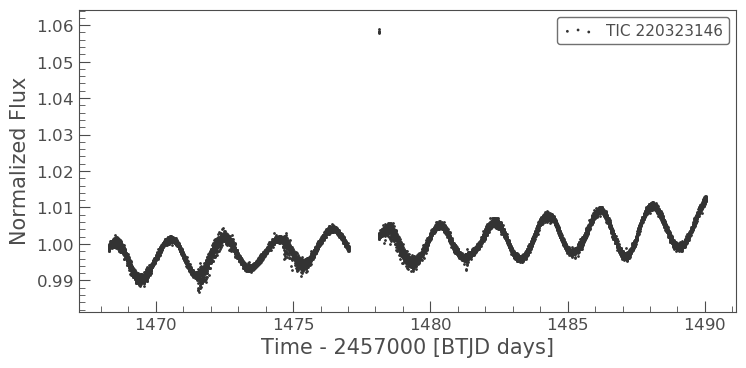

In [86]:
lc3.scatter();

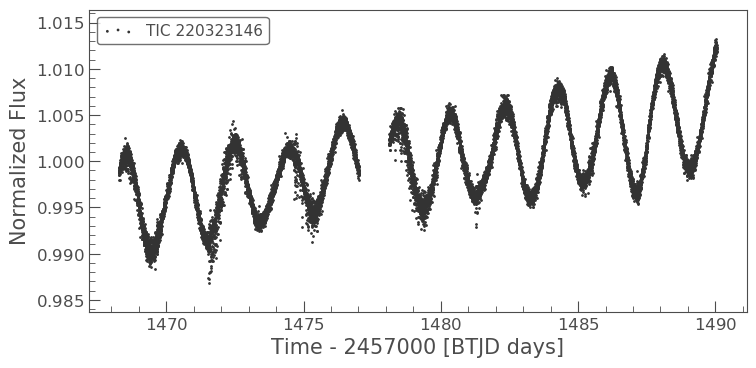

In [87]:
lc3.remove_nans().remove_outliers(sigma=5).scatter();

In [88]:
pg3 = lc3.to_periodogram(oversample_factor=1)


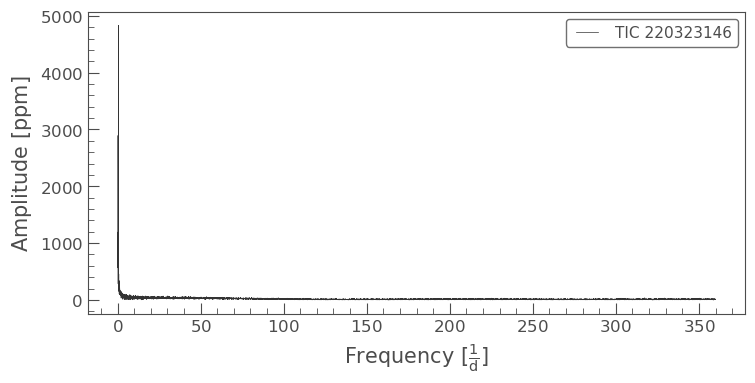

In [89]:
pg3.plot();

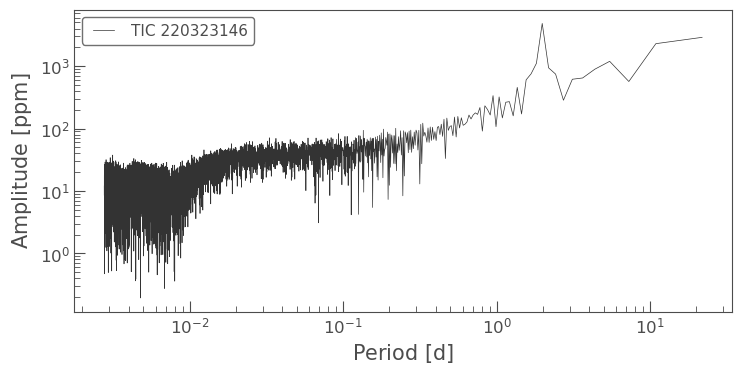

In [90]:
pg3.plot(view='period', scale='log')

Best Period: 1.9793107127419385 d


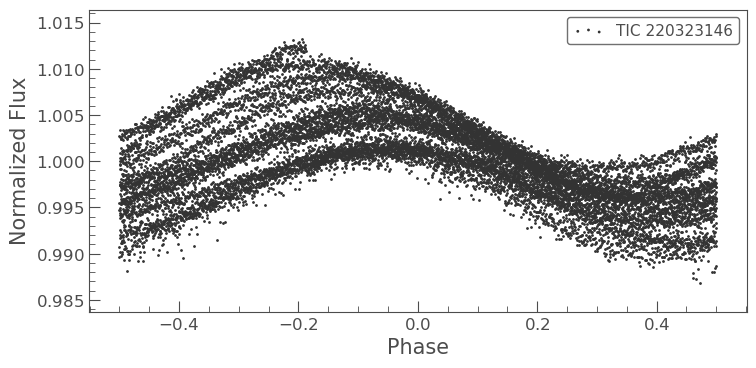

In [91]:
period = pg3.period_at_max_power
print('Best Period: {}'.format(period))
lc3.remove_nans().remove_outliers(sigma=5).fold(period.value).scatter();

In [92]:
#redo of tpf1
tpf4=TessTargetPixelFile('https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018349182459-s0006-0000000220338578-0126-s_tp.fits')

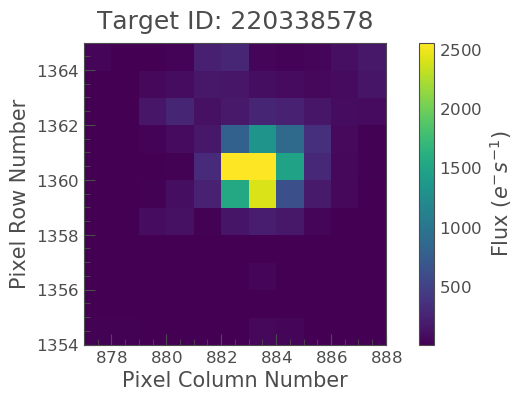

In [93]:
tpf4.plot(frame=0)

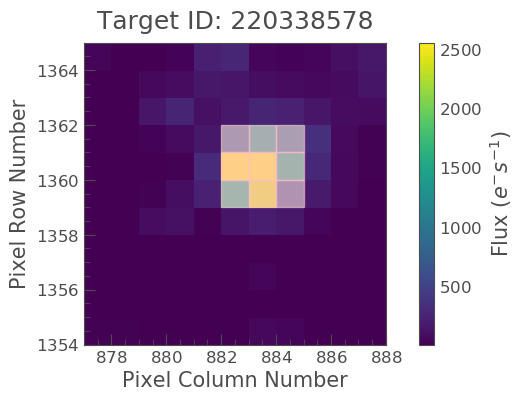

In [94]:
tpf4.plot(aperture_mask=tpf4.pipeline_mask)

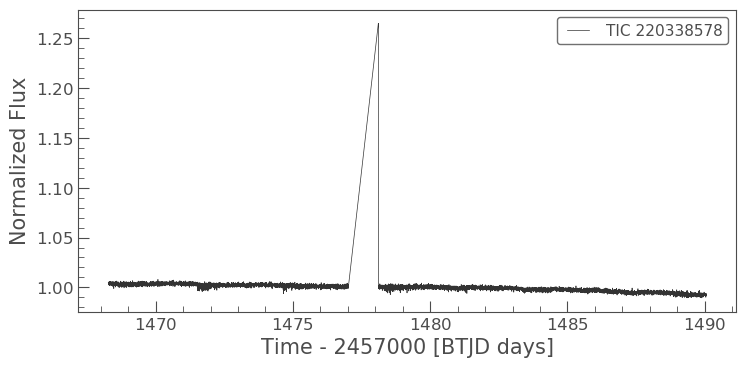

In [95]:
lc4=tpf4.to_lightcurve()
lc4.plot();

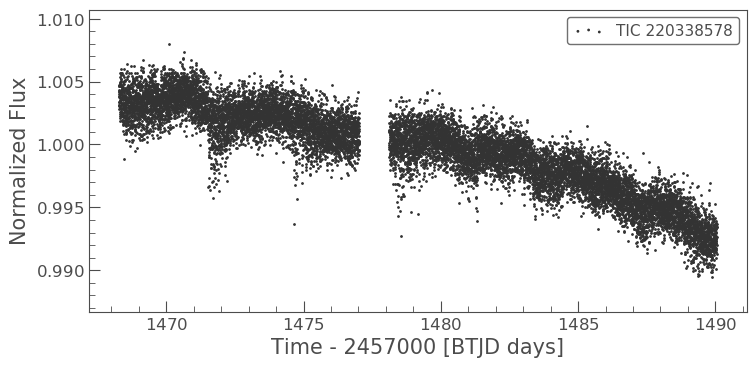

In [96]:
lc4.remove_nans().remove_outliers(sigma=6).scatter();

In [97]:
pg4=lc4.to_periodogram(oversample_factor=1)

Best Period21.772418625266255 d


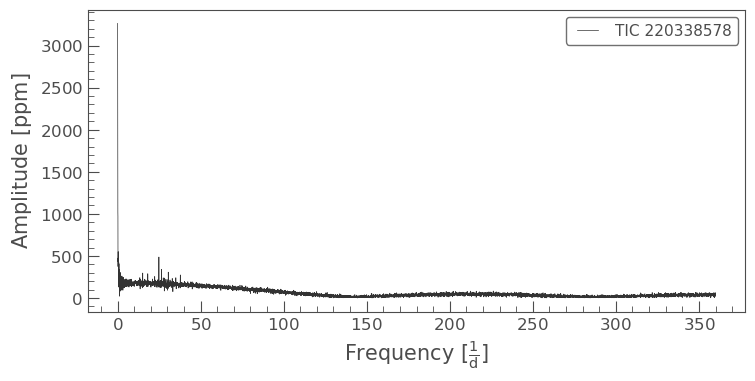

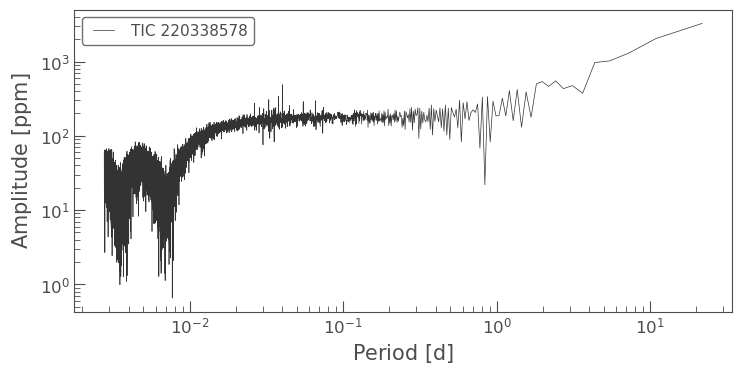

In [98]:
pg4.plot();
pg4.plot(view='period',scale='log')
period=pg4.period_at_max_power
print("Best Period{}".format(period))

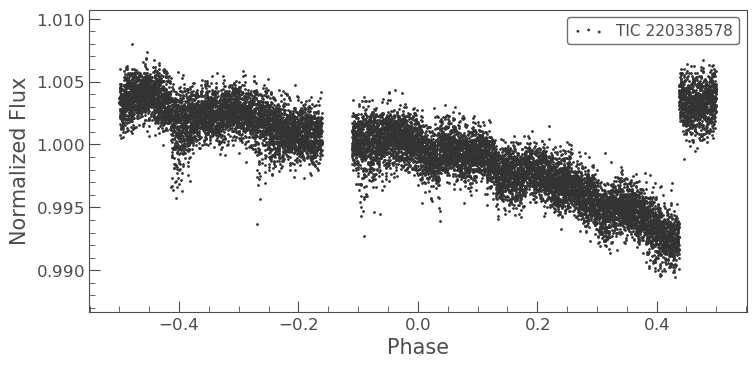

In [99]:
lc4.remove_nans().remove_outliers(sigma=4).fold(period.value).scatter();

In [100]:
lckh=lc3.remove_nans().remove_outliers(sigma=5)
lc15d=lc4.remove_nans().remove_outliers(sigma=6)

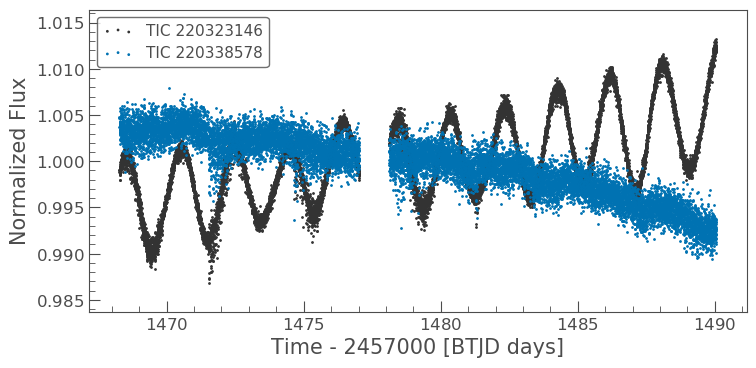

In [102]:
ax = lckh.scatter(label='TIC 220323146');
lc15d.scatter(ax=ax, label='TIC 220338578');